# Data Visualization 
## Basic plotting with Matplotlib
Using artist layer of Matplotlib to visualize percentage of surveyed respondents interest in the different data science topics. Project completed as part of the final assignment for IBM's Data Visualization with Python course. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_survey = pd.read_csv('https://cocl.us/datascience_survey_data', index_col=0)
df_survey

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [3]:
# calcualte total respondents for each topic
df_survey['Total']=df_survey.sum(axis=1)
df_survey['Total']

Big Data (Spark / Hadoop)     2188
Data Analysis / Statistics    2192
Data Journalism               2120
Data Visualization            2176
Deep Learning                 2169
Machine Learning              2180
Name: Total, dtype: int64

In [4]:
# calculate percentage and round up to 2 decimals
df_survey['Very interested']=np.round(df_survey['Very interested']/df_survey['Total'],2)
df_survey['Somewhat interested']=np.round(df_survey['Somewhat interested']/df_survey['Total'],2)
df_survey['Not interested']=np.round(df_survey['Not interested']/df_survey['Total'],2)

In [5]:
df_survey.sort_values(by='Very interested', ascending=False).iloc[0].drop('Total')

Very interested        0.77
Somewhat interested    0.20
Not interested         0.03
Name: Data Analysis / Statistics, dtype: float64

In [6]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

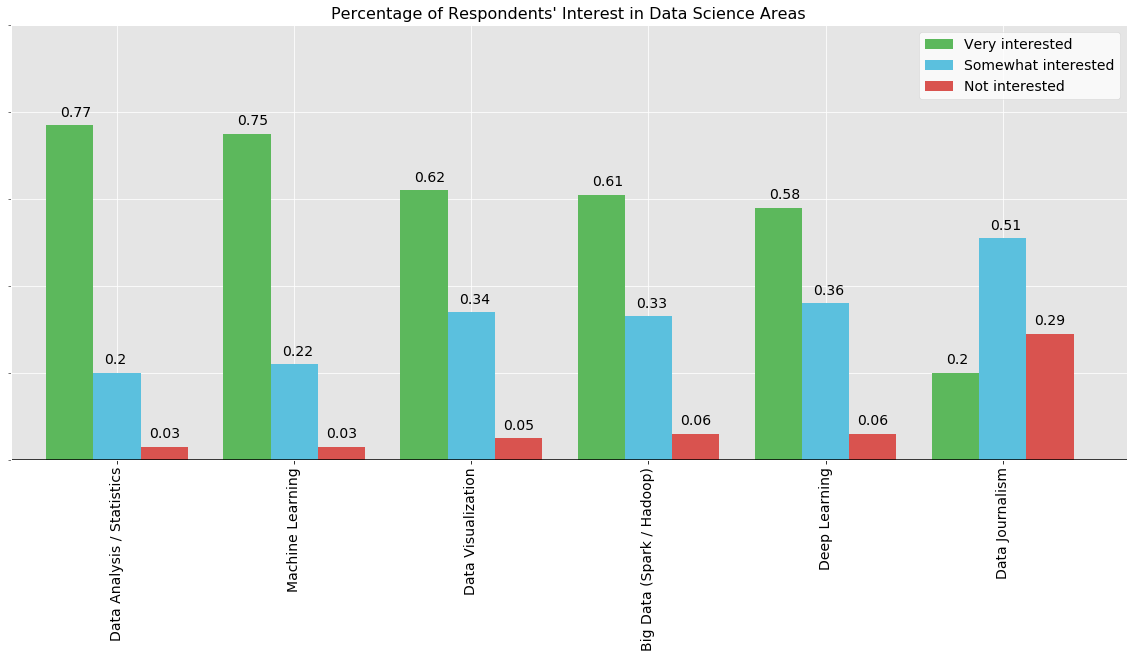

In [7]:
# plot data with percentage
columns=['Very interested', 'Somewhat interested', 'Not interested']

# use artist layer
ax=df_survey[columns].sort_values(by='Very interested', ascending=False).plot(kind='bar', 
                          figsize=(20, 8),
                         width=0.8,
                         color=['#5cb85c', '#5bc0de', '#d9534f'])
ax.set_ylim(0,1)
ax.set_xlim(-0.6,5.7)
ax.set_title('Percentage of Respondents\' Interest in Data Science Areas', fontdict = {'fontsize' : 16}) # change the font size of the title
ax.legend(fontsize=14, facecolor='white') # change the font size of the legend
ax.tick_params(axis="x", labelsize=14) # change the font size of the x axix label

# remove the left, top, and right borders; make sure the color of x axix labels is black
ax.set_yticklabels([]) # turn off y ticks
ax.axhline(0, color='black') # draw an x axix line 
ax.tick_params(axis='x', colors='black') # make sure the color of x axix labels is black

# Add percentage numbers over the bars
r=0
for i in range(0,6):
    for index, value in enumerate(df_survey.sort_values(by='Very interested', ascending=False).iloc[i].drop('Total')):
        #print(index, value)
        label=format(value)
        #print(index/5, value+0.02)
        ax.annotate(label, xy=(index/4-0.32+r, value+0.02), color='black', fontsize=14)
    r=r+1

plt.show()